In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
processed_data = pd.read_csv('../processed_fred_data.csv', index_col='Date', parse_dates=True)

# Display the first few rows of the data
processed_data.head()

,VIXCLS,CPIAUCSL,SP500,DGS2,DGS10,DGS30,VIXCLS.1,TEDRATE,BAA10Y,SP500.1,...,DGS5_6_mo_return_direction,DGS7_1_mo_return_direction,DGS7_3_mo_return_direction,DGS7_6_mo_return_direction,DGS1_1_mo_return_direction,DGS1_3_mo_return_direction,DGS1_6_mo_return_direction,DGS20_1_mo_return_direction,DGS20_3_mo_return_direction,DGS20_6_mo_return_direction
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2014-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2014-09-30,16.31,237.477,1972.29,0.58,2.52,3.21,16.31,0.22,2.29,1972.29,...,0,0,0,0,0,0,0,0,0,0
2014-10-31,14.03,237.430,2018.05,0.50,2.35,3.07,14.03,0.22,2.39,2018.05,...,0,0,0,0,0,0,0,0,0,0
2014-11-30,13.33,236.983,2067.56,0.47,2.18,2.89,13.33,0.21,2.52,2067.56,...,0,0,0,0,1,0,0,0,0,0


In [2]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2014-07-31 to 2024-09-30
Columns: 132 entries, VIXCLS to DGS20_6_mo_return_direction
dtypes: float64(105), int64(27)
memory usage: 127.8 KB


In [3]:
processed_data.describe()

,VIXCLS,CPIAUCSL,SP500,DGS2,DGS10,DGS30,VIXCLS.1,TEDRATE,BAA10Y,SP500.1,...,DGS5_6_mo_return_direction,DGS7_1_mo_return_direction,DGS7_3_mo_return_direction,DGS7_6_mo_return_direction,DGS1_1_mo_return_direction,DGS1_3_mo_return_direction,DGS1_6_mo_return_direction,DGS20_1_mo_return_direction,DGS20_3_mo_return_direction,DGS20_6_mo_return_direction
count,121.000000,119.000000,121.000000,121.000000,121.000000,121.000000,121.000000,89.000000,121.000000,121.000000,...,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,18.405702,263.918395,3256.280248,1.900744,2.419587,2.876198,18.405702,0.295955,2.247355,3256.280248,...,0.528455,0.520325,0.520325,0.528455,0.528455,0.626016,0.593496,0.504065,0.512195,0.487805
std,7.033294,24.974713,1031.582968,1.563767,1.026308,0.844451,7.033294,0.171423,0.485309,1031.582968,...,0.501231,0.501630,0.501630,0.501231,0.501231,0.485838,0.493190,0.502028,0.501896,0.501896
min,9.510000,234.747000,1920.030000,0.110000,0.550000,1.200000,9.510000,0.060000,1.440000,1920.030000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.420000,243.948000,2363.640000,0.640000,1.690000,2.260000,13.420000,0.200000,1.900000,2363.640000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.260000,255.848000,2945.830000,1.380000,2.300000,2.890000,16.260000,0.250000,2.180000,2945.830000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,20.580000,283.462500,4132.150000,2.800000,2.960000,3.140000,20.580000,0.390000,2.510000,4132.150000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,53.540000,313.534000,5648.400000,5.070000,4.880000,5.040000,53.540000,1.340000,3.930000,5648.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Split the data into features and targets
feature_columns = processed_data.columns[:processed_data.columns.get_loc('BAMLHYH0A0HYM2TRIV')]
target_columns = processed_data.columns[processed_data.columns.get_loc('BAMLHYH0A0HYM2TRIV'):]

# Create feature and target DataFrames
features = processed_data[feature_columns]
targets = processed_data[target_columns]

print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

print("\nFeature columns:")
print(feature_columns.tolist())

print("\nTarget columns:")
print(target_columns.tolist())


Features shape: (123, 69)
Targets shape: (123, 63)

Feature columns:
['VIXCLS', 'CPIAUCSL', 'SP500', 'DGS2', 'DGS10', 'DGS30', 'VIXCLS.1', 'TEDRATE', 'BAA10Y', 'SP500.1', 'DSPIC96', 'A229RX0', 'CMRMTSPL', 'INDPRO', 'IPFPNSS', 'IPFINAL', 'IPCONGD', 'IPDCONGD', 'IPNCONGD', 'IPBUSEQ', 'IPMAT', 'IPDMAT', 'IPNMAT', 'IPMANSICS', 'IPB51222S', 'IPFUELS', 'CUMFNS', 'CLF16OV', 'CE16OV', 'UNRATE', 'UEMPMEAN', 'UEMPLT5', 'UEMP5TO14', 'UEMP15OV', 'UEMP15T26', 'UEMP27OV', 'PAYEMS', 'USGOOD', 'CES1021000001', 'USCONS', 'MANEMP', 'DMANEMP', 'SRVPRD', 'USWTRADE', 'USTRADE', 'USFIRE', 'USGOVT', 'CES0600000007', 'AWOTMAN', 'HOUST', 'HOUSTNE', 'HOUSTMW', 'HOUSTS', 'HOUSTW', 'ISRATIO', 'M1SL', 'M2SL', 'M2REAL', 'AMBSL', 'BUSLOANS', 'REALLN', 'WPSFD49207', 'WPSFD49502', 'WPSID61', 'WPSID62', 'MZMSL', 'NONREVNS', 'REVOLNS', 'PNFIC1']

Target columns:
['BAMLHYH0A0HYM2TRIV', 'BAMLCC0A0CMTRIV', 'DGS10.1', 'DGS2.1', 'DGS30.1', 'DGS5', 'DGS7', 'DGS1', 'DGS20', 'BAMLHYH0A0HYM2TRIV_1_mo_return', 'BAMLHYH0A0HYM2TRIV

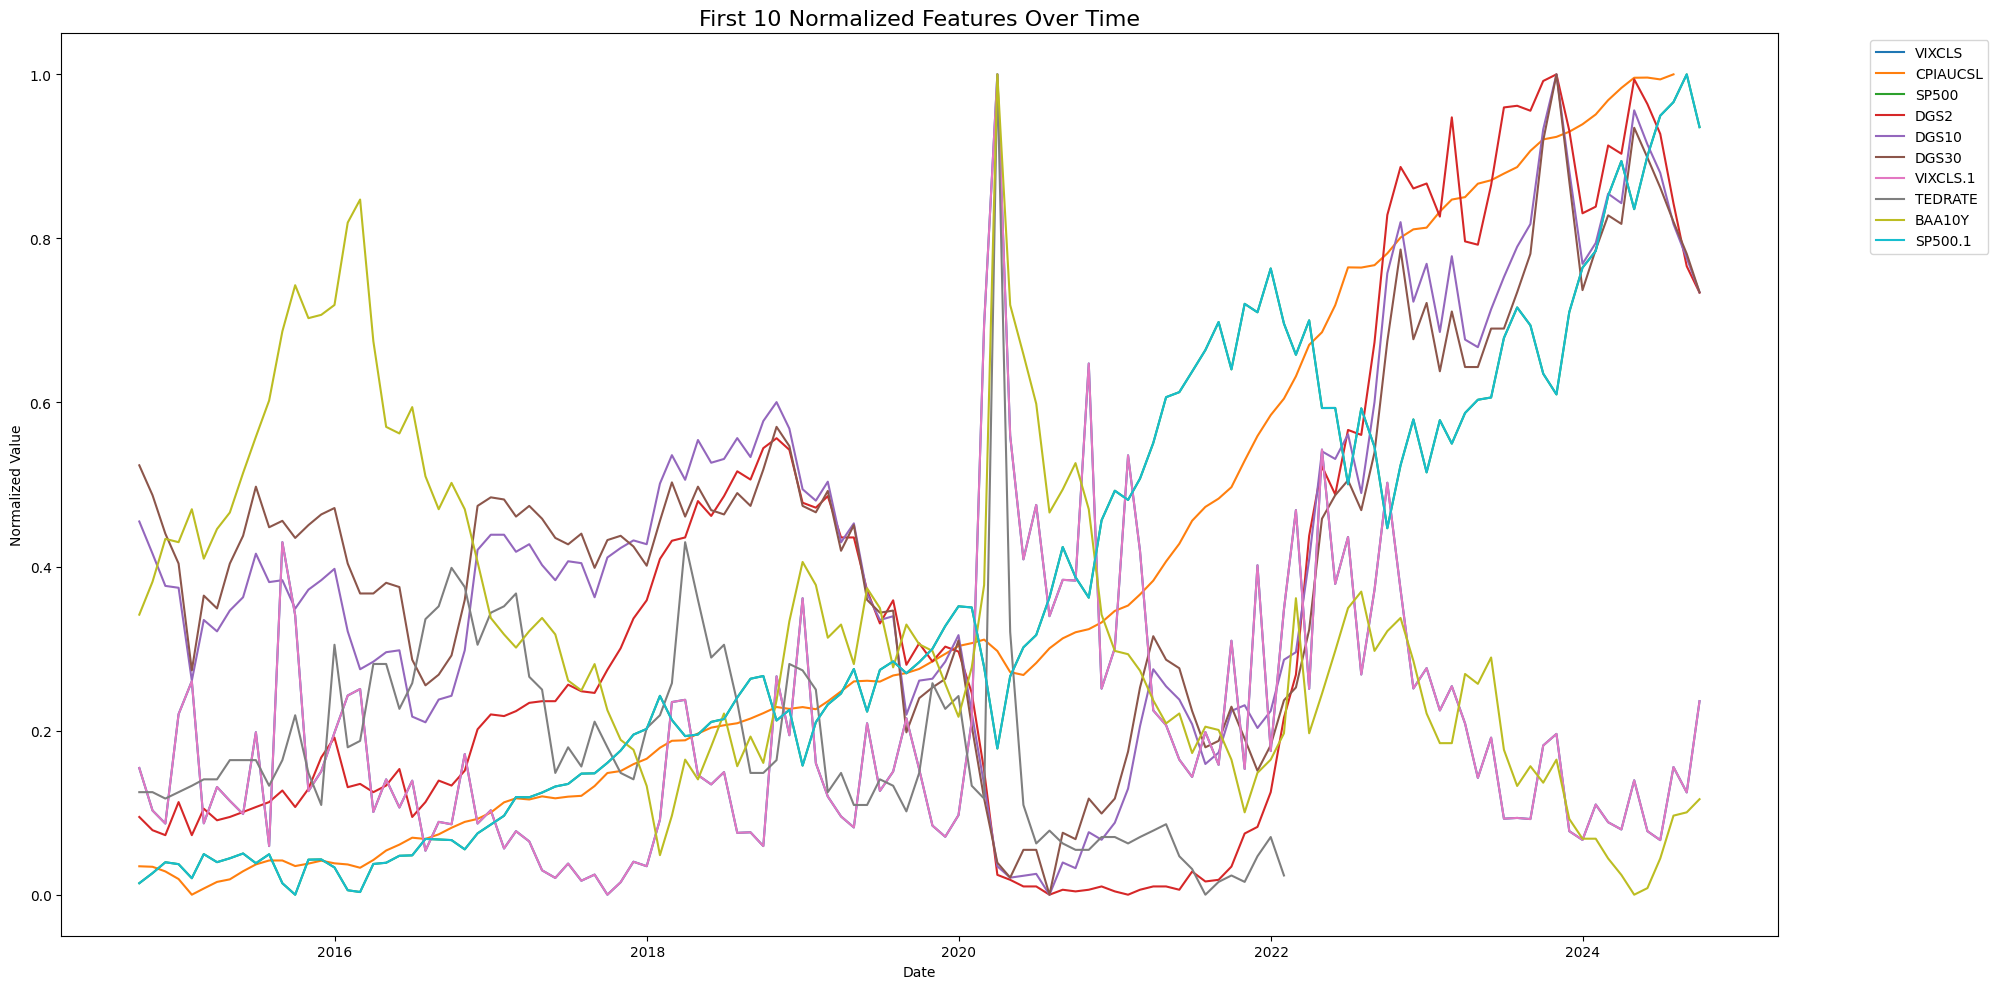

In [6]:
# Select the first 10 features
first_10_features = features.iloc[:, :10]

# Normalize the data using Min-Max scaling
normalized_features = (first_10_features - first_10_features.min()) / (first_10_features.max() - first_10_features.min())

# Create a figure
plt.figure(figsize=(20, 10))
plt.title('First 10 Normalized Features Over Time', fontsize=16)

# Plot all features on the same plot
for column in normalized_features.columns:
    plt.plot(normalized_features.index, normalized_features[column], label=column)

plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

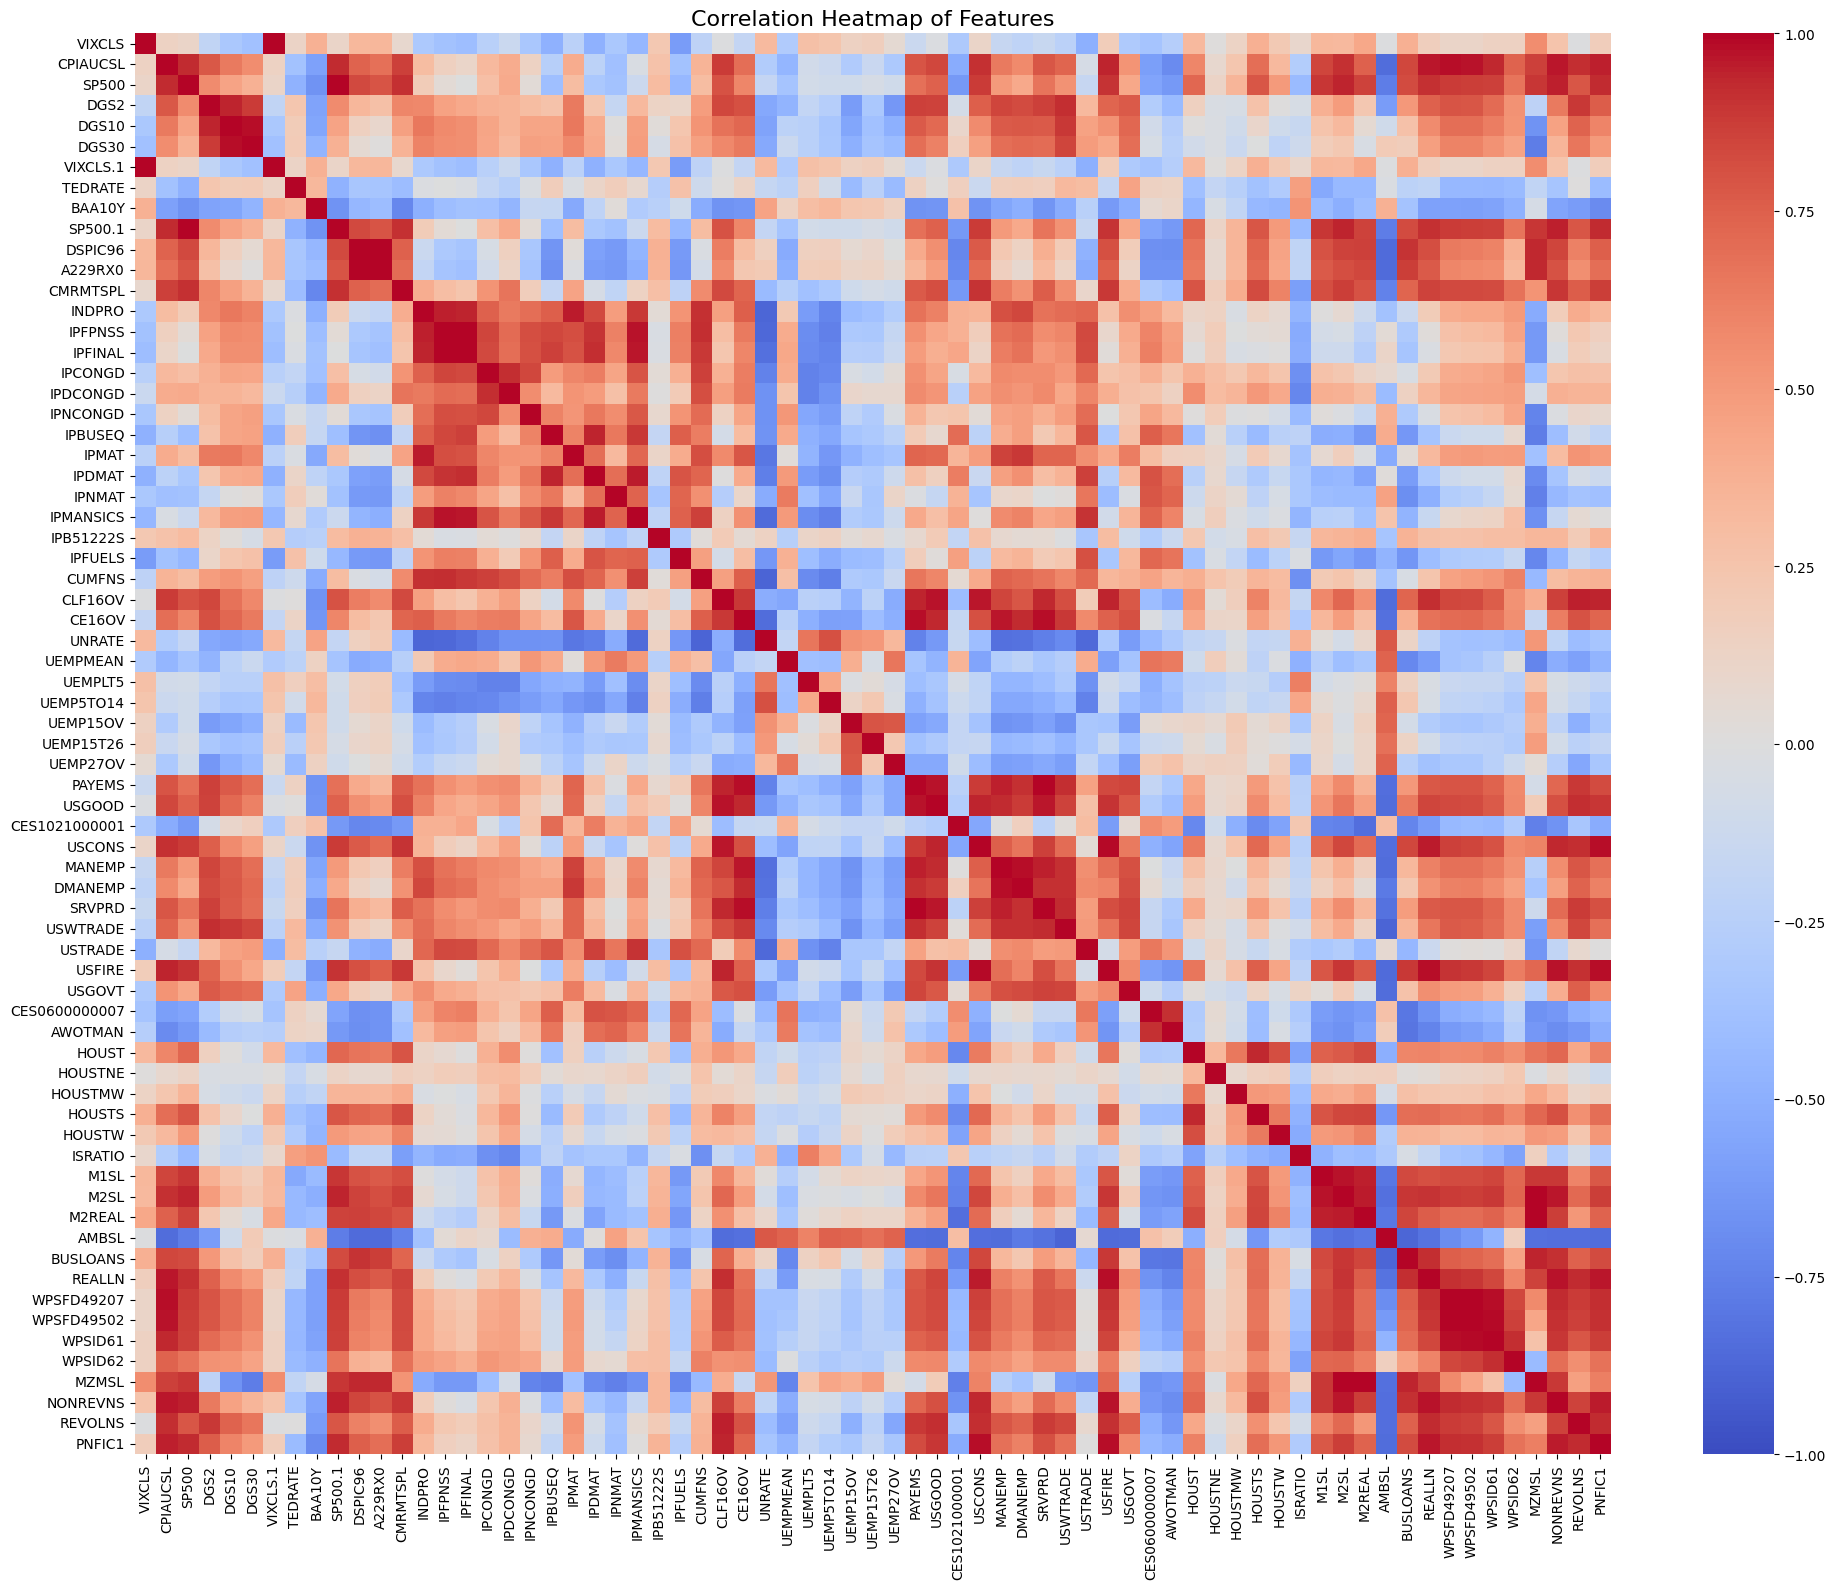

Top 10 most correlated feature pairs:
PAYEMS      SRVPRD        0.999321
SRVPRD      PAYEMS        0.999321
WPSFD49207  WPSFD49502    0.998588
WPSFD49502  WPSFD49207    0.998588
MZMSL       M2REAL        0.997260
M2REAL      MZMSL         0.997260
MZMSL       M2SL          0.996652
M2SL        MZMSL         0.996652
A229RX0     DSPIC96       0.995877
DSPIC96     A229RX0       0.995877
dtype: float64


In [7]:
# Calculate the correlation matrix for the features
correlation_matrix = features.corr()

# Create a figure
plt.figure(figsize=(20, 16))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Heatmap of Features', fontsize=16)
plt.tight_layout()
plt.show()

# Display the top 10 most correlated feature pairs
print("Top 10 most correlated feature pairs:")
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
high_corr = sorted_pairs[sorted_pairs != 1.0]  # Exclude self-correlations
print(high_corr.head(10))


In general, high correlation between our features is not ideal. However, some of these correlations in the Top 10 are expected as the M2 Money Supply is extremely similar to the Real M2 Money Stock. And same thing for MZM Money Supply and M1 Money Supply. We have so many features that we may need to consider selecting one of these features within the high correlation pairs to reduce dimensionality and avoid multicollinearity.